In [1]:
# Implementing broken power law + three parameter power law
# Fit the broken power law to this set of values
%load_ext autoreload 
%autoreload 2
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sns.set_style('white')
sys.path.insert(0, '../../')
from curve_models import NLLS_three_param, power_law_three_param, power_law_exp_three_param
from curve_models import NLLS_w, power_law
from curve_models import BrokenCurve, power_law

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

expmt_dict = {'gl-tiny': '0.1_5_False_uniform_30_0.5_0.5_1880_9400_94001' + '/',
                'ml-20m-uniform': '0.1_5_False_uniform_30_0.5_0.5_20000_100000_1000001' + '/', 
                'ml-20m-tiny':'0.1_5_False_uniform_30_0.5_0.5_5250_21000_213973' + '/',
                'gl': '0.1_5_False_uniform_30_0.5_0.5_5800_29000_290001' +'/'}
dataset_names = ['gl', 'gl-tiny', 'ml-20m-uniform', 'ml-20m-tiny']
# results_dir = "../../results/forecasting/gl/Random/"
# expmt = "5_False_0.1_0.4_item_subset_29000_30_4_290001_5800_0_0.5_0.5_0_0.8/"
# expmt = '0.1_3_False_uniform_30_0.5_0.5_1880_9400_94001' + '/'
# dataset_name = 'ml-20m-uniform'
# expmt = '0.1_5_False_uniform_30_0.5_0.5_20000_100000_1000001' + '/'
# dataset_name = 'ml-20m-tiny'
# expmt = '0.1_5_False_uniform_30_0.5_0.5_5250_21000_213973' + '/'
# dataset_name = 'gl'

# expmt = '0.1_5_False_uniform_30_0.5_0.5_5800_29000_290001' +'/'


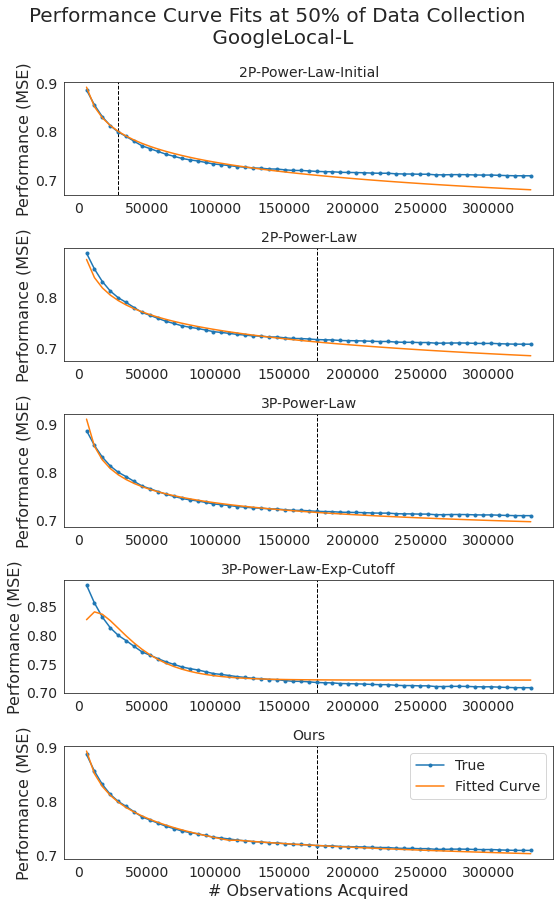

In [33]:
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

dataset_name = 'gl'
expmt = expmt_dict[dataset_name]
results_dir = "../../results/forecasting/" + dataset_name + "/Random/"
results_path = results_dir + expmt + '/'

all_ss = np.loadtxt(results_path + 'sample_sizes')
all_mses = np.loadtxt(results_path + 'mses')

cf_models = {'nlls_initial': NLLS_w(power_law, name="2P-Power-Law-Initial"),
             'nlls_w': NLLS_w(power_law, name="2P-Power-Law"),
             'nlls_3p': NLLS_three_param(power_law_three_param, name="3P-Power-Law"),
             'nlls_3p_exp': NLLS_three_param(power_law_exp_three_param, name="3P-Power-Law-Exp-Cutoff"),
             'broken': BrokenCurve(power_law, name="Ours")}
for run in [2]:
    for n_obs in [30]:
        for i, model_name in enumerate(cf_models):
            ax = axs[i]
            model = cf_models[model_name]
            ss = all_ss[run]
            mses = all_mses[run]
            if 'initial' in model_name:
                model.fit(ss[:5], mses[:5])
            else:
                model.fit(ss[:n_obs], mses[:n_obs])

            if 'initial' in model_name:
                ax.axvline(ss[4], linestyle='--', lw=1, c='black')
            else:
                ax.axvline(ss[n_obs-1], linestyle='--', lw=1, c='black')
            #ax.plot.figure(figsize=(12, 4))
            ax.plot(ss, mses, label='True', marker='.')
            preds = [model.pred(i) for i in ss]
            ax.plot(ss, preds, label='Fitted Curve')
            ax.set_ylabel("Performance (MSE)")
            if i == 4:
                ax.legend()
                ax.set_xlabel("# Observations Acquired")
            ax.set_title(model.name)
plt.tight_layout()
suptitle = plt.suptitle("Performance Curve Fits at 50% of Data Collection \n GoogleLocal-L", y=1.05)
plt.savefig("../../figs/illustrative_fits.png", bbox_inches='tight',bbox_extra_artists=[suptitle])


In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (dataset_name, expmt) in enumerate(expmts):
    ax = axs[i]
    results_dir = "../results/forecasting/" + dataset_name + "/Weighted/"
    results_path = results_dir + expmt + '/'

    all_ss = np.loadtxt(results_path + 'sample_sizes')
    all_mses = np.loadtxt(results_path + 'mses')
    for run in range(5):
        ax.plot(np.log(all_ss[run][:]), np.log(all_mses[run][:]), marker='.')
    ax.set_title(dataset_titles[dataset_name])
    ax.set_ylabel("Model Error (log(MSE))")
    ax.set_xlabel("Training Set Size (log($|\mathcal{A}|$))")
plt.tight_layout()
plt.savefig("../figs/stability_performance_curves.png")